In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_blobs
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from mlxtend.plotting import category_scatter
from mlxtend.plotting import plot_decision_regions

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv', skipinitialspace=True)

## EDA

In [3]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [4]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [6]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

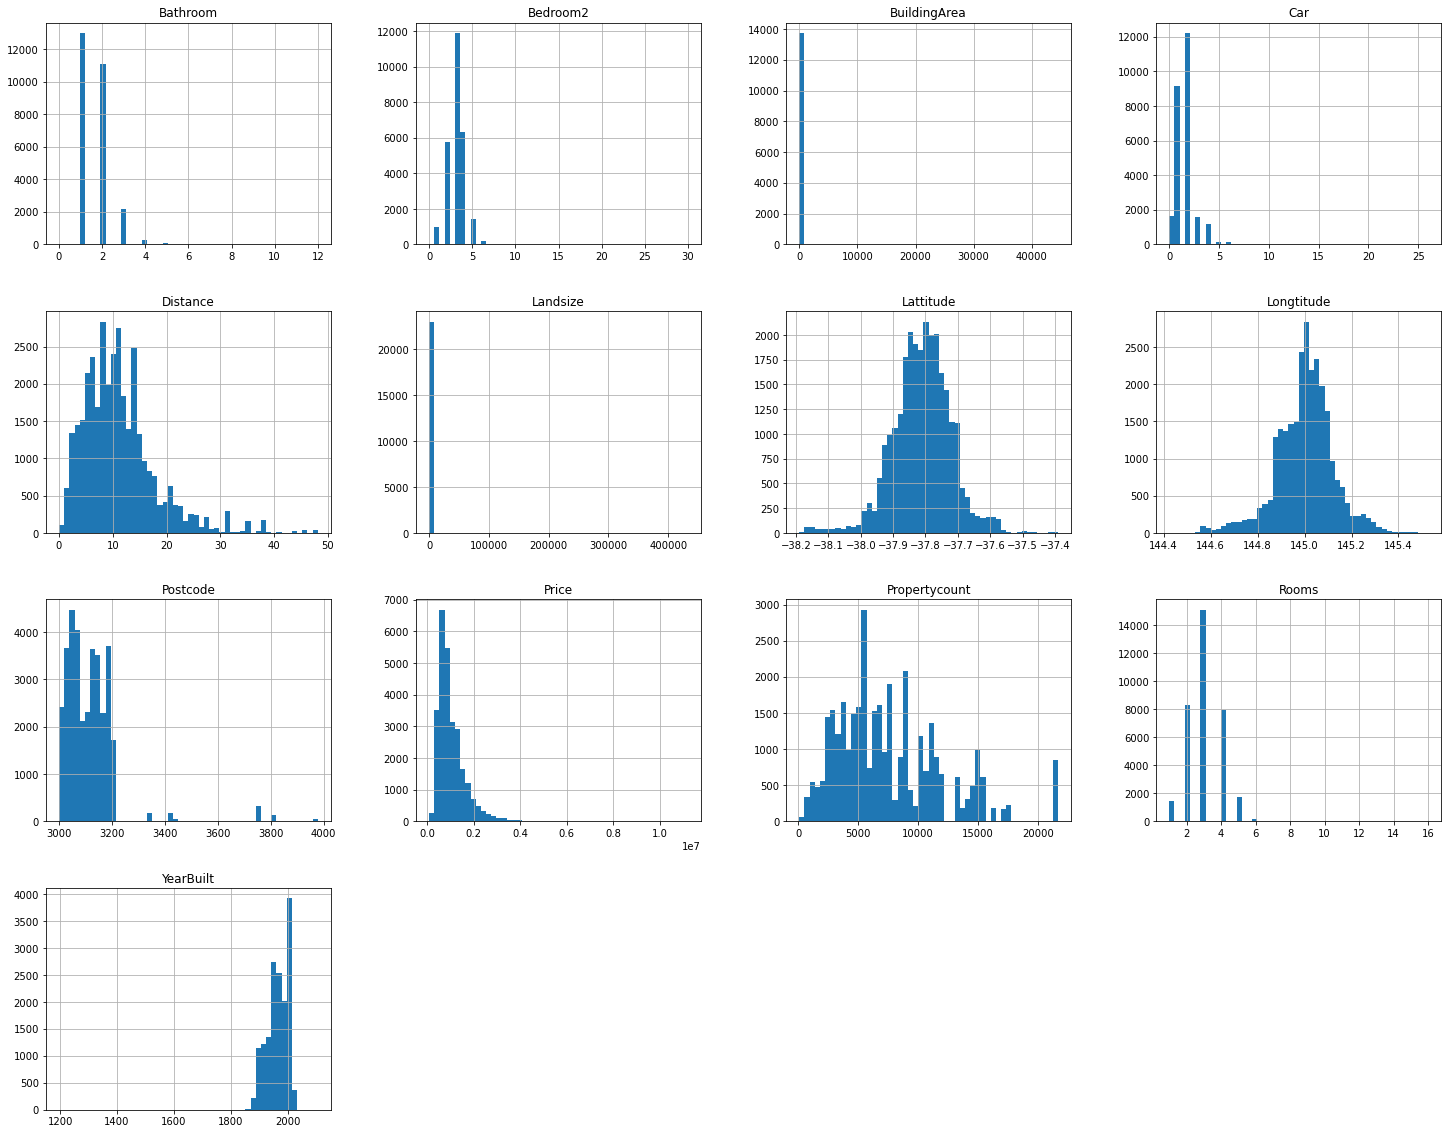

In [7]:
%matplotlib inline

df.hist(bins=50, figsize=(25,20))
plt.show()

<AxesSubplot:>

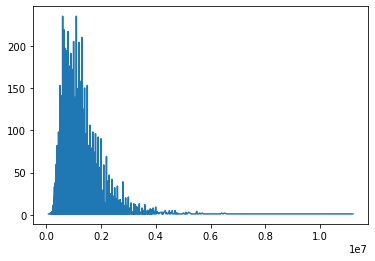

In [8]:
df['Price'].value_counts().sort_index().plot.line()

## Outliers

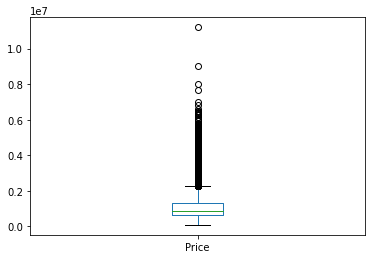

In [9]:
df['Price'].plot(kind='box');

### Cap the Price with outliers at the top boundary 

In [10]:
q1, q3 = df['Price'].quantile([0.25, 0.75])

iqr = q3 - q1

top_boundary = q3 + (iqr * 1.5)

df['Price_capped'] = df['Price']

df.loc[df['Price_capped'] >= top_boundary, 'Price_capped'] = top_boundary

Text(0.5, 1.0, 'Null value heatmap')

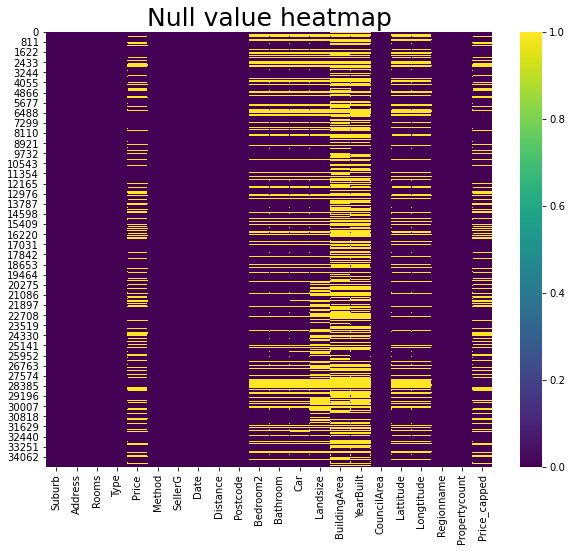

In [11]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cmap='viridis')
plt.title('Null value heatmap',size=25)

### Geographical Feature exploration

In [12]:
len(df['Postcode'].value_counts())

211

In [13]:
len(df['CouncilArea'].value_counts())

33

In [14]:
df['Regionname'].value_counts()

Southern Metropolitan         11836
Northern Metropolitan          9557
Western Metropolitan           6799
Eastern Metropolitan           4377
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: Regionname, dtype: int64

In [15]:
df['Suburb'].value_counts()

Reservoir             844
Bentleigh East        583
Richmond              552
Glen Iris             491
Preston               485
Kew                   467
Brighton              456
Brunswick             444
South Yarra           435
Hawthorn              428
Northcote             424
Camberwell            423
Balwyn North          420
Essendon              409
Coburg                405
Glenroy               400
Brighton East         393
Pascoe Vale           378
St Kilda              374
Port Melbourne        371
Malvern East          369
Prahran               336
Thornbury             322
Balwyn                319
Bentleigh             319
Yarraville            304
Surrey Hills          293
Elwood                288
Moonee Ponds          285
Hawthorn East         284
Hampton               281
Toorak                278
Carnegie              277
Footscray             263
Doncaster             257
Craigieburn           255
Newport               251
Ascot Vale            249
Brunswick We

In [16]:
df['Rooms'].value_counts()

3     15084
2      8332
4      7956
5      1737
1      1479
6       204
7        32
8        19
10        6
9         4
12        3
16        1
Name: Rooms, dtype: int64

In [17]:
df['Type'].value_counts()

h    23980
u     7297
t     3580
Name: Type, dtype: int64

In [18]:
df['Method'].value_counts()

S     19744
SP     5095
PI     4850
VB     3108
SN     1317
PN      308
SA      226
W       173
SS       36
Name: Method, dtype: int64

In [19]:
df['SellerG'].value_counts()

Jellis                         3359
Nelson                         3236
Barry                          3235
hockingstuart                  2623
Marshall                       2027
Ray                            1950
Buxton                         1868
Biggin                          897
Fletchers                       861
Woodards                        714
Brad                            701
McGrath                         602
Noel                            524
Greg                            519
RT                              516
Miles                           478
YPA                             473
Jas                             457
Harcourts                       447
Stockdale                       420
Hodges                          413
Gary                            413
Sweeney                         411
Kay                             360
Raine                           326
HAR                             309
RW                              273
Love                        

## DATA CLEANING

In [20]:
#CHANGE TO DATETIME

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

## FEATURES & ENGINEERING

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Method:

S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.
Type:

br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

## FEATURE ENGINEER NEW COLUMNS

In [23]:
df['MonthSold'] = df['Date'].dt.month

In [24]:
df['DayofWeekSold'] = df['Date'].dt.dayofweek

In [25]:
df['YearSold'] = df['Date'].dt.year

In [26]:
df['MonthSold'].value_counts()

3     4507
10    4340
9     3773
11    3700
7     3366
8     3350
6     3323
5     2761
4     2116
2     2008
12    1097
1      516
Name: MonthSold, dtype: int64

In [27]:
df['DayofWeekSold'].value_counts()

5    22490
0     3435
6     2158
1     2065
2     2041
4     1966
3      702
Name: DayofWeekSold, dtype: int64

In [28]:
df['YearSold'].value_counts()

2017    19852
2016    10292
2018     4713
Name: YearSold, dtype: int64

In [29]:
df[df['YearBuilt'] > 2018]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price_capped,MonthSold,DayofWeekSold,YearSold
2453,Bulleen,3 Maringa St,4,h,NaN,SP,Ray,2016-07-11,11.8,3105.0,4.0,2.0,2.0,729.0,255.0,2106.0,Manningham City Council,-37.76370,145.08810,Eastern Metropolitan,4480.0,NaN,7,0,2016
33033,Bentleigh,1 Wyuna Ct,3,h,1100000.0,VB,Woodards,2018-03-17,11.4,3204.0,3.0,1.0,4.0,635.0,242.0,2019.0,Glen Eira City Council,-37.92963,145.03666,Southern Metropolitan,6795.0,1100000.0,3,5,2018


In [30]:
df_negBA = df[df['BuildingArea'] < 1]

In [31]:
df_negBA

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price_capped,MonthSold,DayofWeekSold,YearSold
7211,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,2017-04-03,2.3,3051.0,2.0,1.0,1.0,215.0,0.00,2000.0,Melbourne City Council,-37.79530,144.94370,Northern Metropolitan,6821.0,841000.0,4,0,2017
16540,South Melbourne,148 Cobden St,3,h,NaN,S,Marshall,2017-06-24,1.9,3205.0,3.0,2.0,0.0,282.0,0.01,1920.0,Port Phillip City Council,-37.83658,144.96292,Southern Metropolitan,5943.0,NaN,6,5,2017
19775,Balwyn North,14 Wanbrow Av,5,h,1950000.0,S,RT,2017-03-09,9.7,3104.0,5.0,3.0,2.0,743.0,0.00,1949.0,Boroondara City Council,-37.80235,145.09311,Southern Metropolitan,7809.0,1950000.0,3,3,2017
19840,Bundoora,22 Moreton Cr,3,h,814000.0,S,Barry,2017-03-09,12.1,3083.0,3.0,1.0,2.0,542.0,0.00,1970.0,Banyule City Council,-37.70861,145.05691,Northern Metropolitan,10175.0,814000.0,3,3,2017
20038,Heidelberg Heights,8 Thames St,3,h,NaN,SN,Miles,2017-03-09,8.8,3081.0,3.0,1.0,2.0,658.0,0.00,1920.0,Banyule City Council,-37.75287,145.05547,Eastern Metropolitan,2947.0,NaN,3,3,2017
20223,Roxburgh Park,16 Sandover Dr,4,h,570000.0,S,Raine,2017-03-09,20.6,3064.0,4.0,2.0,2.0,504.0,0.00,2000.0,Hume City Council,-37.61419,144.93448,Northern Metropolitan,5833.0,570000.0,3,3,2017
20262,Thornbury,19/337 Station St,3,t,900000.0,VB,Jellis,2017-03-09,7.0,3071.0,3.0,2.0,2.0,120.0,0.00,2000.0,Darebin City Council,-37.76343,145.02096,Northern Metropolitan,8870.0,900000.0,3,3,2017
20576,Guys Hill,8 Montuna Gr,4,h,NaN,PN,O'Brien,2017-09-09,39.0,3807.0,4.0,3.0,6.0,NaN,0.00,2013.0,Cardinia Shire Council,-38.01458,145.38619,Eastern Victoria,129.0,NaN,9,5,2017
21155,Elwood,6/31 Beach Av,2,u,735000.0,S,Buxton,2017-09-16,7.2,3184.0,2.0,1.0,2.0,NaN,0.00,1960.0,Port Phillip City Council,-37.88646,144.98491,Southern Metropolitan,8989.0,735000.0,9,5,2017
21510,Roxburgh Park,109 Rossiter Av,3,h,NaN,SN,Barry,2017-09-16,20.6,3064.0,3.0,2.0,2.0,647.0,0.00,2000.0,Hume City Council,-37.63211,144.92587,Northern Metropolitan,5833.0,NaN,9,5,2017


In [32]:
df['HouseAge'] = df['YearSold'] - df['YearBuilt']

In [33]:
df['HouseAge'].value_counts() #some negative values that need to be removed

 47.0     828
 57.0     699
 46.0     547
 67.0     542
 37.0     496
 56.0     465
 66.0     427
 17.0     362
 5.0      301
 6.0      288
 7.0      286
 116.0    286
 16.0     280
 117.0    267
 97.0     265
 8.0      257
 3.0      253
 42.0     252
 86.0     239
 87.0     239
 4.0      237
 27.0     235
 96.0     229
 12.0     214
 127.0    209
 10.0     209
 11.0     209
 77.0     207
 107.0    205
 9.0      204
 106.0    198
 126.0    197
 48.0     177
 2.0      175
 76.0     172
 32.0     171
 13.0     162
 18.0     159
 36.0     157
 68.0     149
 52.0     148
 22.0     147
 1.0      146
 14.0     143
 15.0     133
 58.0     122
 38.0     118
 51.0     117
 41.0     115
 21.0     112
 19.0     110
 62.0     107
 26.0      98
 91.0      96
 137.0     96
 20.0      91
 0.0       81
 23.0      78
 28.0      76
 92.0      74
 88.0      73
 61.0      69
 43.0      68
 108.0     61
 98.0      60
 33.0      60
 136.0     59
 102.0     57
 118.0     57
 82.0      55
 31.0      53
 101.0

In [34]:
negyear = df[df['HouseAge'] < 0 ].index
df.drop(negyear, inplace=True)

In [35]:
df['HouseAge'].value_counts()

47.0     828
57.0     699
46.0     547
67.0     542
37.0     496
56.0     465
66.0     427
17.0     362
5.0      301
6.0      288
7.0      286
116.0    286
16.0     280
117.0    267
97.0     265
8.0      257
3.0      253
42.0     252
86.0     239
87.0     239
4.0      237
27.0     235
96.0     229
12.0     214
127.0    209
10.0     209
11.0     209
77.0     207
107.0    205
9.0      204
106.0    198
126.0    197
48.0     177
2.0      175
76.0     172
32.0     171
13.0     162
18.0     159
36.0     157
68.0     149
52.0     148
22.0     147
1.0      146
14.0     143
15.0     133
58.0     122
38.0     118
51.0     117
41.0     115
21.0     112
19.0     110
62.0     107
26.0      98
91.0      96
137.0     96
20.0      91
0.0       81
23.0      78
28.0      76
92.0      74
88.0      73
61.0      69
43.0      68
108.0     61
98.0      60
33.0      60
136.0     59
118.0     57
102.0     57
82.0      55
31.0      53
101.0     52
78.0      50
81.0      48
128.0     48
24.0      46
30.0      43

In [36]:
df['BdPrRm'] = df['Bedroom2'] / df['Rooms']

In [37]:
df['BthPrRm'] = df['Bathroom'] / df['Rooms']

In [38]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price_capped,MonthSold,DayofWeekSold,YearSold,HouseAge,BdPrRm,BthPrRm
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,NaN,3,2,2016,NaN,1.0,0.500000
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,1480000.0,3,5,2016,NaN,1.0,0.500000
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,1035000.0,4,5,2016,116.0,1.0,0.500000
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,NaN,4,5,2016,NaN,1.0,0.666667
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,1465000.0,4,0,2017,117.0,1.0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,1480000.0,2,5,2018,NaN,1.0,0.250000
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,888000.0,2,5,2018,0.0,1.0,1.000000
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,705000.0,2,5,2018,18.0,1.0,0.500000
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,1140000.0,2,5,2018,NaN,NaN,NaN


### REMOVE NULL ROWS OF TARGET - PRICE & Price_capped

In [39]:
df.dropna(subset = ['Price'], inplace=True)

In [40]:
df.dropna(subset = ['Price_capped'], inplace=True)

### REMOVE NULL ROWS OF FEATURES

In [41]:
df.dropna(subset = ['Bathroom'], inplace=True)

In [42]:
df.dropna(subset = ['YearBuilt'], inplace=True)

In [43]:
df.dropna(subset = ['BuildingArea'], inplace=True)

In [44]:
df.dropna(subset = ['Car'], inplace=True)

In [45]:
df.dropna(subset = ['Lattitude', 'Longtitude'], inplace=True)

In [46]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize         1184
BuildingArea        0
YearBuilt           0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
Price_capped        0
MonthSold           0
DayofWeekSold       0
YearSold            0
HouseAge            0
BdPrRm              0
BthPrRm             0
dtype: int64

In [47]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Price_capped,MonthSold,DayofWeekSold,YearSold,HouseAge,BdPrRm,BthPrRm
count,10064.000000,1.006400e+04,10064.000000,10064.000000,10064.000000,10064.000000,10064.000000,8880.000000,10064.000000,10064.000000,10064.000000,10064.000000,10064.000000,1.006400e+04,10064.000000,10064.000000,10064.000000,10064.000000,10064.000000,10064.000000
mean,3.111188,1.085396e+06,11.521671,3115.090620,3.092210,1.657194,1.706081,523.431982,150.295938,1967.096880,-37.804570,144.992495,7484.722079,1.042077e+06,6.927862,3.982114,2016.766793,49.669913,0.996503,0.547820
std,0.961992,6.799561e+05,7.058072,120.645655,0.964254,0.717696,0.968991,1061.732563,87.692231,36.781205,0.093638,0.123261,4390.699893,5.308817e+05,2.928537,1.869401,0.635157,36.705403,0.084141,0.195553
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.185600,144.423790,249.000000,1.310000e+05,1.000000,0.000000,2016.000000,0.000000,0.000000,0.166667
25%,3.000000,6.350000e+05,6.500000,3044.000000,2.000000,1.000000,1.000000,212.000000,100.000000,1950.000000,-37.859903,144.919580,4380.000000,6.350000e+05,4.000000,3.000000,2016.000000,17.000000,1.000000,0.400000
50%,3.000000,8.900000e+05,10.500000,3084.000000,3.000000,2.000000,2.000000,477.000000,133.000000,1970.000000,-37.798305,144.999700,6543.000000,8.900000e+05,7.000000,5.000000,2017.000000,47.000000,1.000000,0.500000
75%,4.000000,1.330000e+06,14.300000,3152.000000,4.000000,2.000000,2.000000,652.000000,181.000000,2000.000000,-37.747000,145.067680,10331.000000,1.330000e+06,9.000000,5.000000,2017.000000,67.000000,1.000000,0.666667
max,12.000000,9.000000e+06,48.100000,3978.000000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2018.000000,-37.397800,145.526350,21650.000000,2.285000e+06,12.000000,6.000000,2018.000000,821.000000,3.000000,2.000000


In [48]:
corr_matrix = df.corr()
corr_matrix['Price_capped'].sort_values(ascending=False)

Price_capped     1.000000
Price            0.929931
BuildingArea     0.502119
Rooms            0.496103
Bedroom2         0.481983
Bathroom         0.452860
HouseAge         0.362932
Longtitude       0.234493
Car              0.201365
DayofWeekSold    0.051833
Landsize         0.051745
MonthSold        0.022263
Postcode         0.016491
BthPrRm          0.014798
YearSold        -0.009721
BdPrRm          -0.034452
Propertycount   -0.074065
Lattitude       -0.244751
Distance        -0.267434
YearBuilt       -0.362352
Name: Price_capped, dtype: float64

In [49]:
df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Price_capped,MonthSold,DayofWeekSold,YearSold,HouseAge,BdPrRm,BthPrRm
Rooms,1.000000,0.470365,0.271453,0.086098,0.968219,0.628931,0.407650,0.101118,0.616301,0.014645,0.019984,0.074514,-0.076544,0.496103,0.042707,0.045865,0.184587,-0.011481,-0.100055,-0.250814
Price,0.470365,1.000000,-0.244866,0.025233,0.457440,0.460536,0.207281,0.058407,0.506852,-0.318443,-0.217860,0.203396,-0.059727,0.929931,0.026210,0.053329,-0.008390,0.318956,-0.030302,0.046395
Distance,0.271453,-0.244866,1.000000,0.508407,0.277988,0.126662,0.253004,0.138557,0.136708,0.320317,-0.066870,0.168266,0.000149,-0.267434,0.015133,-0.003886,0.311351,-0.315591,0.017138,-0.133378
Postcode,0.086098,0.025233,0.508407,1.000000,0.089134,0.111406,0.063892,0.069663,0.078286,0.104149,-0.181462,0.355425,0.028164,0.016491,0.011687,-0.000810,0.126574,-0.102174,0.005934,0.047324
Bedroom2,0.968219,0.457440,0.277988,0.089134,1.000000,0.630689,0.411465,0.101074,0.605412,0.023536,0.024085,0.074643,-0.074559,0.481983,0.046626,0.048216,0.206781,-0.020007,0.131264,-0.219555
Bathroom,0.628931,0.460536,0.126662,0.111406,0.630689,1.000000,0.318935,0.075994,0.564971,0.197648,-0.039081,0.100690,-0.052584,0.452860,0.030171,0.038019,0.112799,-0.196104,0.019567,0.538551
Car,0.407650,0.207281,0.253004,0.063892,0.411465,0.318935,1.000000,0.123523,0.322369,0.137494,0.018826,0.032452,-0.026058,0.201365,0.028982,0.031659,0.149704,-0.135188,0.018611,-0.033999
Landsize,0.101118,0.058407,0.138557,0.069663,0.101074,0.075994,0.123523,1.000000,0.083264,0.037719,0.042429,-0.008205,-0.032659,0.051745,-0.005018,0.004227,0.083997,-0.036296,-0.001327,0.000948
BuildingArea,0.616301,0.506852,0.136708,0.078286,0.605412,0.564971,0.322369,0.083264,1.000000,0.066308,-0.026628,0.087673,-0.054757,0.502119,0.032902,0.038167,0.083313,-0.065003,-0.017148,0.043832
YearBuilt,0.014645,-0.318443,0.320317,0.104149,0.023536,0.197648,0.137494,0.037719,0.066308,1.000000,0.097798,-0.027090,0.021169,-0.362352,0.006749,-0.004270,0.127855,-0.999853,0.024853,0.240278


### Bedroom2 and Rooms have high correlation (0.968) - drop one

In [50]:
df.drop(['Bedroom2'], axis=1, inplace=True)

In [51]:
# DONT USE

In [52]:
#newcorr_matrix = df.loc[df['Price'] > 1000000].corr()
#newcorr_matrix['Price'].sort_values(ascending=False)

In [53]:
#df.loc[df['Price'] > 1000000].plot(kind='scatter', x='Rooms', y='Price', alpha=0.1)

In [54]:
#df.loc[(df['Price'] > 1000000) & (df['Rooms'] == 2)]

In [55]:
#df.loc[df['Price'] > 1000000]['Rooms'].value_counts()

In [56]:
#newcorr_matrix = df.corr()
#newcorr_matrix['Price'].sort_values(ascending=False)

In [57]:
# BEGIN USE

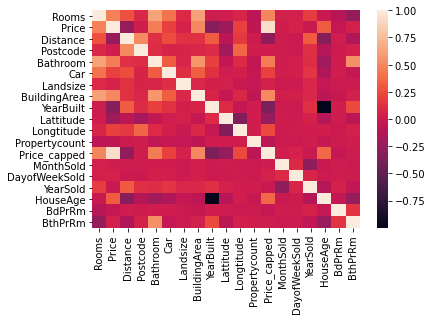

In [58]:
sns.heatmap(df.corr());

<AxesSubplot:xlabel='BuildingArea', ylabel='Price'>

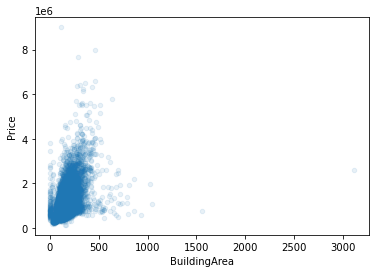

In [59]:
df.plot(kind='scatter', x='BuildingArea', y='Price', alpha=0.1)

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

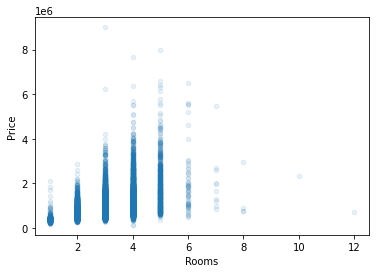

In [60]:
df.plot(kind='scatter', x='Rooms', y='Price', alpha=0.1)

<AxesSubplot:xlabel='Bathroom', ylabel='Price'>

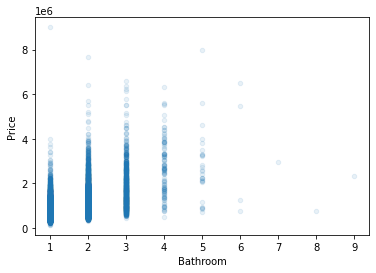

In [61]:
df.plot(kind='scatter', x='Bathroom', y='Price', alpha=0.1)

<AxesSubplot:xlabel='HouseAge', ylabel='Price'>

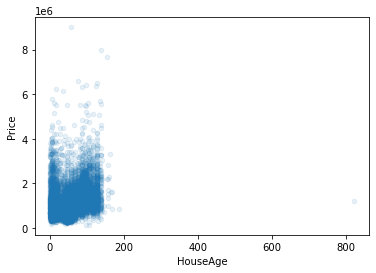

In [62]:
df.plot(kind='scatter', x='HouseAge', y='Price', alpha=0.1)

<AxesSubplot:xlabel='YearBuilt', ylabel='Price'>

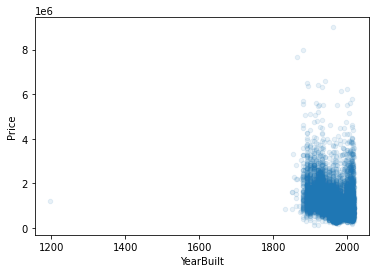

In [63]:
df.plot(kind='scatter', x='YearBuilt', y='Price', alpha=0.1)

<AxesSubplot:xlabel='YearBuilt', ylabel='Price'>

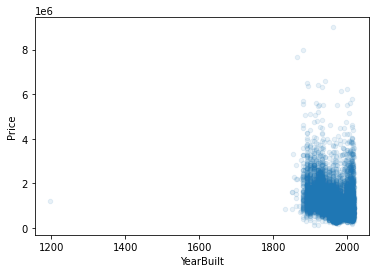

In [64]:
df.plot(kind='scatter', x='YearBuilt', y='Price', alpha=0.1)

No handles with labels found to put in legend.


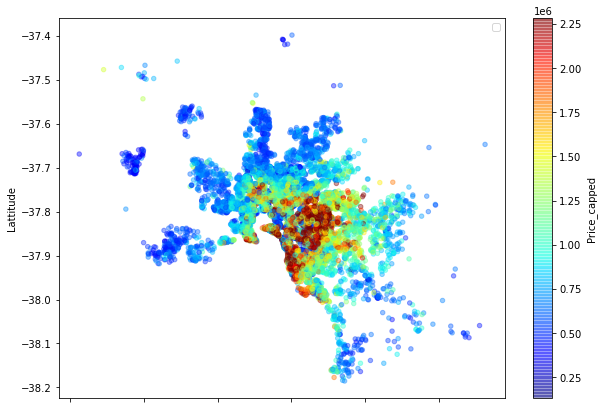

In [65]:
df.plot(kind='scatter', x='Longtitude', y='Lattitude', alpha=0.4, figsize=(10,7), c='Price_capped', cmap=plt.get_cmap('jet'), colorbar=True,)
plt.legend()      

## BASELINE MODEL

### Drop Features with a very high count of categories

In [66]:
df.drop(['Suburb', 'Address', 'Method', 'SellerG', 'CouncilArea'], axis=1, inplace=True)

In [67]:
df['Landsize'] = df['Landsize'].fillna(df['Landsize'].mean())

In [68]:
df['Type'].value_counts()

h    7484
u    1721
t     859
Name: Type, dtype: int64

In [69]:
#df['Type'] = pd.get_dummies(df['Type'], drop_first=True)

### further EDA with Type of property and Regions

In [70]:
df.groupby(['Type']).mean()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Price_capped,MonthSold,DayofWeekSold,YearSold,HouseAge,BdPrRm,BthPrRm
Type,,,,,,,,,,,,,,,,,,,
h,3.401256,1.220354e+06,12.518453,3118.223811,1.745991,1.853421,560.526011,167.993929,1960.345671,-37.799357,144.991852,7324.388028,1.162722e+06,6.989311,4.003875,2016.832977,56.487306,0.995609,0.513655
t,2.876601,9.075737e+05,10.310827,3101.927823,1.830035,1.575087,314.883136,136.272183,2000.356228,-37.814548,144.995963,7208.279395,9.023700e+05,6.812573,3.975553,2016.710128,16.353900,0.995052,0.642006
u,1.966880,5.872674e+05,7.791400,3108.035445,1.184776,1.130738,466.216263,80.333498,1979.854736,-37.822256,144.993562,8319.936665,5.871657e+05,6.718187,3.890761,2016.507263,36.652528,1.001114,0.649380


In [71]:
pd.get_dummies(df['Type'], drop_first=True)

,t,u
2,0,0
4,0,0
6,0,0
11,0,0
14,0,0
...,...,...
34847,0,0
34849,0,0
34853,0,0
34854,1,0


In [72]:
pd.get_dummies(df['Regionname'], drop_first=True)

,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
2,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
6,0,1,0,0,0,0,0
11,0,1,0,0,0,0,0
14,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
34847,0,1,0,0,0,0,0
34849,0,1,0,0,0,0,0
34853,0,0,0,0,0,1,0
34854,0,0,0,0,0,1,0


In [73]:
df['Regionname']

2        Northern Metropolitan
4        Northern Metropolitan
6        Northern Metropolitan
11       Northern Metropolitan
14       Northern Metropolitan
                 ...          
34847    Northern Metropolitan
34849    Northern Metropolitan
34853     Western Metropolitan
34854     Western Metropolitan
34856     Western Metropolitan
Name: Regionname, Length: 10064, dtype: object

## ALL PRICES

In [74]:
X = pd.get_dummies(df.drop(columns=['Price_capped', 'Price','Date','Lattitude','Longtitude','YearBuilt','Postcode','BdPrRm','BthPrRm','Propertycount']))

y = df['Price_capped']
#X = pd.get_dummies(df[features].fillna(0))

## PRICE ABOVE or BELOW 1000000 (some further analysis)

In [75]:
# X = df.loc[df['Price'] > 1000000].drop(columns=['Price_capped', 'Price','Date','Lattitude','Longtitude', 'YearBuilt','Postcode','BdPrRm','BthPrRm','Propertycount'])

# y = df.loc[df['Price'] > 1000000]['Price']


In [ ]:
# Linear Regression

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [80]:
model_us = LinearRegression()

model_us.fit(X_train, y_train)

y_pred_us = model_us.predict(X_test)

print('MAE', mean_absolute_error(y_test, y_pred_us))
print('RMSE', mean_squared_error(y_test, y_pred_us, squared=False))
print('R2', r2_score(y_test, y_pred_us))

MAE 212398.87648742495
RMSE 283901.27766959165
R2 0.716827016491767


In [81]:
# :LASSO

In [83]:
from sklearn import linear_model
reg_us = linear_model.Lasso(alpha=0.1)

reg_us.fit(X_train, y_train)

y_predREG_us = reg_us.predict(X_test)

print('MAE', mean_absolute_error(y_test, y_predREG_us))
print('RMSE', mean_squared_error(y_test, y_predREG_us, squared=False))
print('R2', r2_score(y_test, y_predREG_us))

MAE 212398.81906348333
RMSE 283901.2904871498
R2 0.7168269909224121


C:\Users\mvall\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58613177685967.72, tolerance: 188958414555.37222
  positive)


In [84]:
# RANDOM FOREST

In [85]:
modelRF_us = RandomForestRegressor()

modelRF_us.fit(X_train, y_train)

y_predRF_us = modelRF_us.predict(X_test)

print('MAE', mean_absolute_error(y_test, y_predRF_us))
print('RMSE', mean_squared_error(y_test, y_predRF_us, squared=False))
print('R2', r2_score(y_test, y_predRF_us))

MAE 145770.6853542043
RMSE 210330.26021534437
R2 0.8445750842026636


In [86]:
# DECISION TREE

In [87]:
modeldt_us = DecisionTreeRegressor()

modeldt_us.fit(X_train, y_train)

y_predDT_us = modeldt_us.predict(X_test)

print('MAE', mean_absolute_error(y_test, y_predDT_us))
print('RMSE', mean_squared_error(y_test, y_predDT_us, squared=False))
print('R2', r2_score(y_test, y_predDT_us))

MAE 198275.13907284767
RMSE 289368.7089765484
R2 0.7058151823177652


In [88]:
### Scaling & Fitting to Linear REgression

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_x = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)
#mean_age = X_train['Landsize'].mean()

#X_train.fillna(mean_age)

#X_test.fillna(mean_age)
model = LinearRegression()

model.fit(scaled_x, y_train)

y_pred = model.predict(scaled_x_test)

print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE', mean_squared_error(y_test, y_pred, squared=False))
print('R2', r2_score(y_test, y_pred))

MAE 212409.45889304538
RMSE 283895.53137798805
R2 0.7168384794769518


### kernel density estimation of actual values and predicted values

<AxesSubplot:xlabel='Price_capped'>

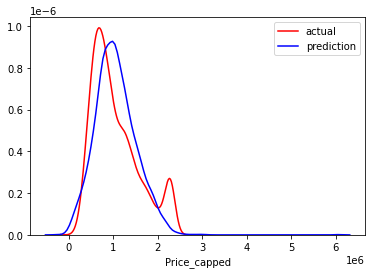

In [82]:
import seaborn as sns
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'actual')
sns.distplot(y_pred, hist = False, color = 'b', label = 'prediction', ax = ax1)

In [83]:
# plt.scatter(scaled_x_test, y_test, color='black');
# plt.plot(scaled_x_test, y_predLR, color='blue', linewidth=3);

In [84]:
model.coef_

array([ 9.91766770e+04, -2.37665164e+05,  7.98523747e+04,  2.40416738e+04,
        1.65438999e+04,  1.17233156e+05,  9.28042013e+03,  9.88552113e+02,
        2.17490736e+04,  9.96145507e+04,  4.96482623e+16,  3.13876169e+16,
        4.30198173e+16,  3.79829563e+17,  9.52814377e+16,  5.46956659e+17,
        1.09586541e+17,  2.52597188e+17,  5.43257172e+17,  5.04414743e+17,
        9.63757997e+16])

In [85]:
model.intercept_

1035141.1865020704

<AxesSubplot:>

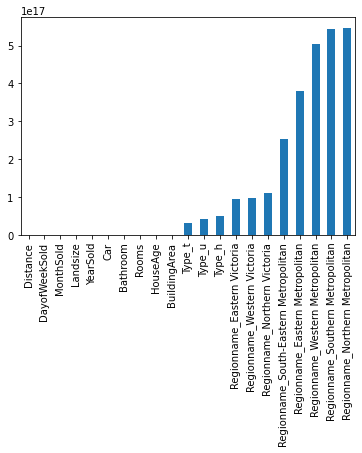

In [86]:
pd.Series(model.coef_,index=X.columns).sort_values().plot(kind='bar')

In [89]:
#over $1000000
# pd.Series(model.coef_,index=X.columns).sort_values(ascending=False).plot(kind='bar')

In [90]:
#under #1000000
# pd.Series(model.coef_,index=X.columns).sort_values(ascending=False).plot(kind='bar')

In [91]:
scaled_x_test.shape

(3322, 21)

In [92]:
y_test.shape

(3322,)

In [93]:
y_pred.shape

(3322,)

### LASSO

In [90]:

reg = linear_model.Lasso(alpha=0.1)

reg.fit(scaled_x, y_train)

y_predREG = reg.predict(scaled_x_test)

print('MAE', mean_absolute_error(y_test, y_predREG))
print('RMSE', mean_squared_error(y_test, y_predREG, squared=False))
print('R2', r2_score(y_test, y_predREG))

MAE 212398.87424550595
RMSE 283901.2777461993
R2 0.7168270163389449


C:\Users\mvall\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6810170290532.4375, tolerance: 188958414555.37222
  positive)


<AxesSubplot:>

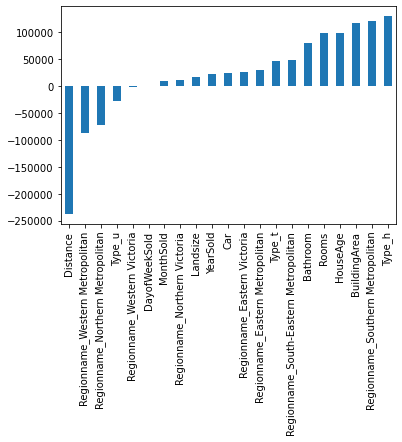

In [95]:
pd.Series(reg.coef_,index=X.columns).sort_values().plot(kind='bar')

### DECISION TREE

In [91]:
modeldt = DecisionTreeRegressor(max_depth=10)

modeldt.fit(scaled_x, y_train)

y_predDT = modeldt.predict(scaled_x_test)

print('MAE', mean_absolute_error(y_test, y_predDT))
print('RMSE', mean_squared_error(y_test, y_predDT, squared=False))
print('R2', r2_score(y_test, y_predDT))

MAE 176569.3303653837
RMSE 257992.32295185694
R2 0.766153600079715


In [92]:
r2_score(y_test, y_predDT)

0.766153600079715

In [93]:
np.sqrt(mean_squared_error(y_test, y_predDT))

257992.32295185694

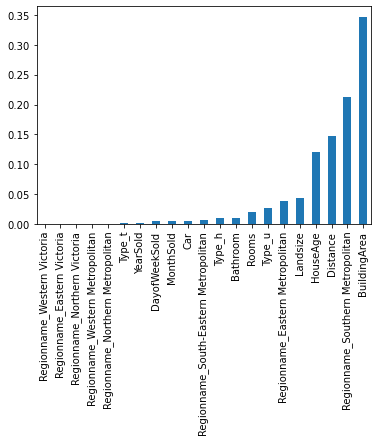

In [99]:
pd.Series(modeldt.feature_importances_, index=X.columns).sort_values().plot(kind='bar');

### kernel density estimation of actual values and predicted values

<AxesSubplot:xlabel='Price_capped'>

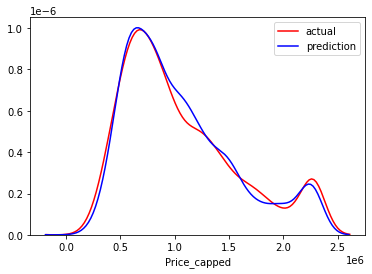

In [100]:
import seaborn as sns
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'actual')
sns.distplot(y_predDT, hist = False, color = 'b', label = 'prediction', ax = ax1)

### RANDOM FOREST

In [94]:
modelRF = RandomForestRegressor(max_depth=8, n_estimators=100, random_state=42)

modelRF.fit(scaled_x, y_train)

y_predRF = modelRF.predict(scaled_x_test)

print('MAE', mean_absolute_error(y_test, y_predRF))
print('RMSE', mean_squared_error(y_test, y_predRF, squared=False))
print('R2', r2_score(y_test, y_predRF))

MAE 156660.42939422824
RMSE 219485.335343927
R2 0.8307502094784953


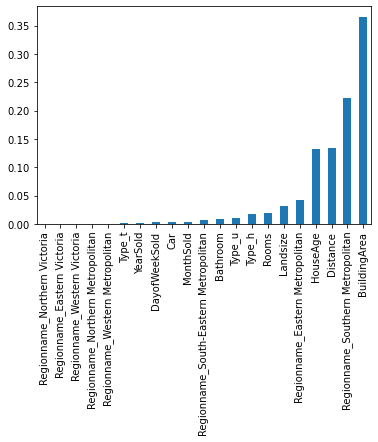

In [102]:
pd.Series(modelRF.feature_importances_, index=X.columns).sort_values().plot(kind='bar');

### kernel density estimation of actual values and predicted values

<AxesSubplot:xlabel='Price_capped'>

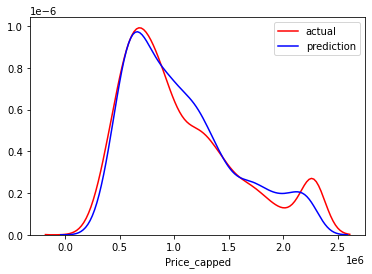

In [102]:
import seaborn as sns
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'actual')
sns.distplot(y_predRF, hist = False, color = 'b', label = 'prediction', ax = ax1)

### SVM

In [95]:
modelSVM = SVC(kernel='linear')

modelSVM.fit(scaled_x, y_train)

y_predSVM = modelSVM.predict(scaled_x_test)

mean_absolute_error(y_test, y_predSVM)
#print('RMSE', mean_squared_error(y_test, y_predRF, squared=False))
#print('R2', r2_score(y_test, y_predRF))

224598.7462372065

In [96]:
r2_score(y_test, y_predSVM)

0.6019873547989207

In [97]:
np.sqrt(mean_squared_error(y_test, y_predSVM))

336581.21502228384

### MAE: 224598.75
### RMSE: 336581.215
### R2: 0.60

<AxesSubplot:>

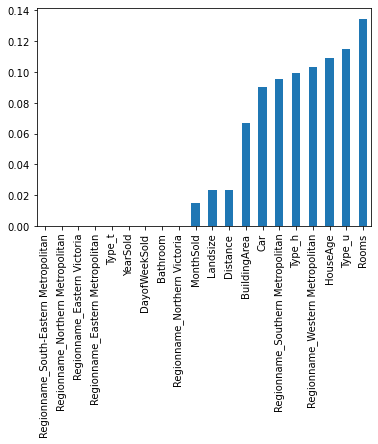

In [98]:
pd.Series(abs(modelSVM.coef_[0]), index=X.columns).nlargest(20).sort_values().plot(kind='bar')

In [99]:
modelSVM.coef_[0]

array([ 0.13453395,  0.0232577 ,  0.        ,  0.09023172,  0.02309255,
        0.06683545,  0.01489212,  0.        ,  0.        ,  0.10937116,
        0.09959928,  0.        , -0.11494543,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.09571303, -0.10308341,
        0.        ])

### kernel density estimation of actual values and predicted values

<AxesSubplot:xlabel='Price_capped'>

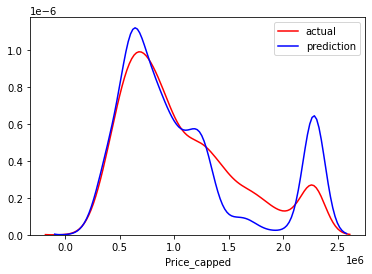

In [100]:
import seaborn as sns
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'actual')
sns.distplot(y_predSVM, hist = False, color = 'b', label = 'prediction', ax = ax1)

In [105]:
df

,Rooms,Type,Price,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,Price_capped,MonthSold,DayofWeekSold,YearSold,HouseAge,BdPrRm,BthPrRm
2,2,h,1035000.0,2016-04-02,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,Northern Metropolitan,4019.0,1035000.0,4,5,2016,116.0,1.000000,0.500000
4,3,h,1465000.0,2017-04-03,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,Northern Metropolitan,4019.0,1465000.0,4,0,2017,117.0,1.000000,0.666667
6,4,h,1600000.0,2016-04-06,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,Northern Metropolitan,4019.0,1600000.0,4,2,2016,2.0,0.750000,0.250000
11,3,h,1876000.0,2016-07-05,2.5,3067.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,Northern Metropolitan,4019.0,1876000.0,7,1,2016,106.0,1.333333,0.666667
14,2,h,1636000.0,2016-08-10,2.5,3067.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,Northern Metropolitan,4019.0,1636000.0,8,2,2016,126.0,1.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,3,h,500000.0,2018-02-24,25.5,3750.0,2.0,2.0,383.0,118.0,2016.0,-37.61940,145.03951,Northern Metropolitan,2940.0,500000.0,2,5,2018,2.0,1.000000,0.666667
34849,3,h,570000.0,2018-02-24,25.5,3750.0,2.0,2.0,404.0,158.0,2012.0,-37.61031,145.03393,Northern Metropolitan,2940.0,570000.0,2,5,2018,6.0,1.000000,0.666667
34853,2,h,888000.0,2018-02-24,6.3,3013.0,2.0,1.0,98.0,104.0,2018.0,-37.81551,144.88826,Western Metropolitan,6543.0,888000.0,2,5,2018,0.0,1.000000,1.000000
34854,2,t,705000.0,2018-02-24,6.3,3013.0,1.0,2.0,220.0,120.0,2000.0,-37.82286,144.87856,Western Metropolitan,6543.0,705000.0,2,5,2018,18.0,1.000000,0.500000


## PIPELINE

In [96]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=42) #stratify????
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [110]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

pipe = Pipeline([
    ('scaling', StandardScaler()),
    ('lr' , LinearRegression(normalize=True))
    
    
    
])

scores = cross_val_score(pipe, X_train_full, y_train_full, cv=5, scoring='neg_mean_absolute_error')

scores.mean()

-212585.0465348082

In [111]:
pipe = Pipeline([
    ('scaling', StandardScaler()),
    ('lr' , LinearRegression(normalize=True))
    
    
    
])

scoresR2 = cross_val_score(pipe, X_train_full, y_train_full, cv=5, scoring='r2')
scoresRMSE = cross_val_score(pipe, X_train_full, y_train_full, cv=5, scoring='neg_mean_squared_error')

print(scoresR2.mean())
print(scoresRMSE.mean())

0.7187785807915427
-78576771633.07158


In [112]:
np.sqrt(78576771633.07158) #RMSE

280315.48589593044

In [153]:
cdf = pd.DataFrame(data = model.coef_, index = X.columns, columns = ['Coefficients'])
rankcoff=cdf.sort_values("Coefficients", ascending = False)
rankcoff

,Coefficients
Regionname_Northern Metropolitan,5.469567e+17
Regionname_Southern Metropolitan,5.432572e+17
Regionname_Western Metropolitan,5.044147e+17
Regionname_Eastern Metropolitan,3.798296e+17
Regionname_South-Eastern Metropolitan,2.525972e+17
Regionname_Northern Victoria,1.095865e+17
Regionname_Western Victoria,9.637580e+16
Regionname_Eastern Victoria,9.528144e+16
Type_h,4.964826e+16
Type_u,4.301982e+16


In [111]:
pipe = Pipeline([
    ('scaling', StandardScaler()),
    ('rfc' , RandomForestRegressor(max_depth= 10))
    
    
    
])

scores = cross_val_score(pipe, X_train_full, y_train_full, cv=5, scoring='neg_mean_absolute_error')

scores.mean()

-149591.9175142239

In [135]:
pipe = Pipeline([
    ('scaling', StandardScaler()),
    ('rfc' , RandomForestRegressor(max_depth=45, max_leaf_nodes=35, min_samples_leaf=5,
                      n_estimators=50))
    
    
    
])

scoresR2 = cross_val_score(pipe, X_train_full, y_train_full, cv=5, scoring='r2')
scoresRMSE = cross_val_score(pipe, X_train_full, y_train_full, cv=5, scoring='neg_mean_squared_error')

print(scoresR2.mean())
print(scoresRMSE.mean())

0.7814390612838061
-61286592087.80569


In [136]:
np.sqrt(61286592087.80569) #RMSE

247561.2895583752

In [122]:
pipe = Pipeline([
    ('scaling', StandardScaler()),
    ('dt' , DecisionTreeRegressor(max_depth=8, max_leaf_nodes=25))
    
    
    
])

scores = cross_val_score(pipe, X_train_full, y_train_full, cv=5, scoring='neg_mean_absolute_error')

scores.mean()

-206581.76770379953

In [118]:
pipe = Pipeline([
    ('scaling', StandardScaler()),
    ('dt' , DecisionTreeRegressor(max_depth=8, max_leaf_nodes=25))
    
    
    
])

scoresR2 = cross_val_score(pipe, X_train_full, y_train_full, cv=5, scoring='r2')
scoresRMSE = cross_val_score(pipe, X_train_full, y_train_full, cv=5, scoring='neg_mean_squared_error')

print(scoresR2.mean())
print(scoresRMSE.mean())

0.7149696387403817
-79692401271.66238


In [119]:
np.sqrt(79692401271.66238)

282298.42591070605

## GRIDSEARCH

In [97]:
# LINEAR REGRESSION

In [98]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X_train_full)
scaled_x_test = scaler.transform(X_test)

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

grid_param = [{'fit_intercept':[True,False], 'normalize':[True,False]}]

gridsearch = GridSearchCV(LinearRegression(),grid_param,cv=5,verbose=0)

best_model_lr = gridsearch.fit(scaled_x,y_train_full)


print(best_model_lr.best_estimator_)

LinearRegression(normalize=True)


In [100]:
best_model_lr.best_params_

{'fit_intercept': True, 'normalize': True}

In [101]:
y_lr_pred = best_model_lr.predict(scaled_x_test)
mean_absolute_error(y_test, y_lr_pred)

213236.36369229073

In [102]:
r2_score(y_test, y_lr_pred)

0.7311665946976971

In [103]:
mean_squared_error(y_test, y_lr_pred, squared=False) #RMSE

278554.3701017253

In [135]:
#cdf = pd.DataFrame(data = lr.coef_, index = X.columns, columns = ['Coefficients'])
#cdf

In [ ]:
# LASSO 

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

grid_param = [{'alpha':[0.001,0.01,0.1,1],'fit_intercept':[True,False], 'normalize':[True,False]}]

gridsearch = GridSearchCV(linear_model.Lasso(),grid_param,cv=5,verbose=0)

best_model_lasso = gridsearch.fit(scaled_x,y_train_full)


print(best_model_lasso.best_estimator_)

C:\Users\mvall\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6596237894525.625, tolerance: 180094883077.12183
  positive)
C:\Users\mvall\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7553958111560.0625, tolerance: 181007211880.97043
  positive)
C:\Users\mvall\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6981180550712.4375, tolerance: 179395662627.62466
  positive)
C:\Users\mvall\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\Users\mvall\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106639672992351.0, tolerance: 880341240321.5728
  positive)
C:\Users\mvall\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105154243403686.0, tolerance: 873448812620.8011
  positive)
C:\Users\mvall\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256727940062527.0, tolerance: 876385221701.1068
  positive)
C:\Users\mvall\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\mvall\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7097485706071.75, tolerance: 183124161678.31607
  positive)
C:\Users\mvall\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7720261908323.0, tolerance: 178031976580.6314
  positive)
C:\Users\mvall\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7080613411788.3125, tolerance: 180094883077.12183
  positive)
C:\Users\mvall\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

Lasso(alpha=1, normalize=True)


C:\Users\mvall\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106463810522660.0, tolerance: 866656171064.6543
  positive)
C:\Users\mvall\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9110436501893.5, tolerance: 225419633330.3269
  positive)


In [105]:
y_lasso_pred = best_model_lasso.predict(scaled_x_test)
mean_absolute_error(y_test, y_lasso_pred)

213136.35462313725

In [106]:
r2_score(y_test, y_lasso_pred)

0.7312768550141131

In [107]:
mean_squared_error(y_test, y_lr_pred, squared=False) #RMSE

278554.3701017253

In [ ]:
# RANDOM FOREST

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

grid_param = [{"n_estimators": [10,50,100,150],
               "max_depth":[5,8,15,30,45,None],
               "min_samples_leaf":[1,2,5,10,15,20,25],
               "max_leaf_nodes": [10,15,20,25,30,35]}]

gridsearch = GridSearchCV(RandomForestRegressor(),grid_param,cv=5,verbose=0, n_jobs = -1)

best_model_rf = gridsearch.fit(scaled_x,y_train_full)


print(best_model_rf.best_estimator_)

RandomForestRegressor(max_leaf_nodes=35, min_samples_leaf=10)


In [113]:
best_model_rf.best_params_

{'max_depth': None,
 'max_leaf_nodes': 35,
 'min_samples_leaf': 10,
 'n_estimators': 100}

In [114]:
y_rf_pred = best_model_rf.predict(scaled_x_test)
mean_absolute_error(y_test, y_rf_pred)

178396.2362967156

In [115]:
r2_score(y_test, y_rf_pred)

0.787132548975095

In [116]:
mean_squared_error(y_test, y_rf_pred, squared=False) #RMSE

247869.44224008315

In [ ]:
#DECISION TREE

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

grid_param = [{"max_depth":[5,8,15,30,None],
               "min_samples_leaf":[1,2,5,10,15,20,25],
               "max_leaf_nodes": [5,10, 15, 20, 25]}]

gridsearch = GridSearchCV(DecisionTreeRegressor(),grid_param,cv=5,verbose=0, n_jobs = -1)

best_model_dt = gridsearch.fit(scaled_x,y_train_full)


print(best_model_dt.best_estimator_)

DecisionTreeRegressor(max_depth=8, max_leaf_nodes=25)


In [109]:
y_dt_pred = best_model_dt.predict(scaled_x_test)
mean_absolute_error(y_test, y_dt_pred)

205802.0396578887

In [110]:
r2_score(y_test, y_dt_pred)

0.7265149543566236

In [111]:
mean_squared_error(y_test, y_dt_pred, squared=False) #RMSE

280953.95596045983

### VOTING REGRESSOR

In [117]:
estimators = [
    ('lr', LinearRegression(normalize=True)),
    ('dt', DecisionTreeRegressor(max_depth=8, max_leaf_nodes=25)),
    ('rfc', RandomForestRegressor(max_leaf_nodes=35, min_samples_leaf=10)),
    ('ls', linear_model.Lasso(alpha=1, normalize=True))
]

vreg = VotingRegressor(estimators=estimators)

best_vote = vreg.fit(scaled_x, y_train_full)

vreg.score(scaled_x_test, y_test)

C:\Users\mvall\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9110436501893.5, tolerance: 225419633330.3269
  positive)


0.7958832829404134

In [118]:
y_vote_pred = best_vote.predict(scaled_x_test)
mean_absolute_error(y_test, y_vote_pred)

177303.62461597667

In [119]:
r2_score(y_test, y_vote_pred)

0.7958832829404134

In [120]:
mean_squared_error(y_test, y_vote_pred, squared=False) #RMSE

242721.16446006298

In [ ]:
#XGBOOST - STOPPED AFTER 5 HOURS AND RISK OF CRASHING MY COMPUTER

In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


pipe = Pipeline([('scalar1',StandardScaler()),("classifier", XGBClassifier())])

estimators = [('xgb', XGBClassifier())]

grid_param = {'classifier__min_child_weight': [1, 5, 10],
              'classifier__gamma': [0.5, 1, 1.5, 2, 5],
              'classifier__subsample': [0.6, 0.8, 1.0],
              'classifier__colsample_bytree': [0.6, 0.8, 1.0],
              'classifier__max_depth': [3, 4, 5]
              }


gridsearch = GridSearchCV(pipe,grid_param,cv=5,verbose=1,n_jobs = -1)

xgb = gridsearch.fit(X_train,y_train)


print(xgb.best_estimator_)


Fitting 5 folds for each of 405 candidates, totalling 2025 fits


C:\Users\mvall\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
y_xgb_pred = xgb.predict(X_test)
mean_absolute_error(y_test, y_xgb_pred)

In [ ]:
from xgboost import plot_importance
plot_importance(xgb_reg.best_estimator_)

### RMSE tells us explicitly how much our predictions deviate, on average, from the actual values in the dataset. 
### In this case, our predicted values are RMSE away from the actual value.

In [130]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor((50, 50), random_state=1)

nn.fit(scaled_x, y_train_full)

#y_proba = nn.predict_proba(scaled_x)[:, 1]

C:\Users\mvall\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(hidden_layer_sizes=(50, 50), random_state=1)

In [121]:
dtint = DecisionTreeRegressor(max_depth=8, max_leaf_nodes=25)
dtint.fit(scaled_x, y_train_full)

DecisionTreeRegressor(max_depth=8, max_leaf_nodes=25)

In [122]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(dtint, random_state=1)

perm.fit(scaled_x, y_train_full)

eli5.show_weights(perm, feature_names=X_train.columns.tolist())

C:\Users\mvall\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\mvall\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.6306 ± 0.0339,BuildingArea
0.3726 ± 0.0166,Regionname_Southern Metropolitan
0.3134 ± 0.0256,Distance
0.0920 ± 0.0059,HouseAge
0.0743 ± 0.0039,Regionname_Eastern Metropolitan
0.0382 ± 0.0018,Rooms
0.0330 ± 0.0074,Type_u
0.0150 ± 0.0022,Landsize
0.0081 ± 0.0012,Regionname_South-Eastern Metropolitan
0 ± 0.0000,Car


In [126]:
lsint = linear_model.Lasso(alpha=1, normalize=True)
lsint.fit(scaled_x, y_train_full)

C:\Users\mvall\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9110436501893.5, tolerance: 225419633330.3269
  positive)


Lasso(alpha=1, normalize=True)

In [127]:
permls = PermutationImportance(lsint, random_state=1)

permls.fit(scaled_x, y_train_full)

eli5.show_weights(permls, feature_names=X_train.columns.tolist()

SyntaxError: unexpected EOF while parsing (<ipython-input-127-9e426661a1cf>, line 5)

In [128]:
lrint = LinearRegression(normalize=True)
lrint.fit(scaled_x, y_train_full)

LinearRegression(normalize=True)

In [129]:
permlr = PermutationImportance(lrint, random_state=1)

permlr.fit(scaled_x, y_train_full)

eli5.show_weights(permlr, feature_names=X_train.columns.tolist())

Weight,Feature
29836394770463884444696576.0000 ± 633476316116476617555968.0000,Type_h
22299637580270850562588672.0000 ± 1054155108290867331334144.0000,Type_u
12270042617734463271993344.0000 ± 145285745559074657796096.0000,Type_t
611859745317329462886400.0000 ± 5408257299660708773888.0000,Regionname_Northern Metropolitan
609741066797035296915456.0000 ± 5048928551580581494784.0000,Regionname_Southern Metropolitan
516153922467620265656320.0000 ± 13351814787134786633728.0000,Regionname_Western Metropolitan
299537308155577666371584.0000 ± 3363837411585268121600.0000,Regionname_Eastern Metropolitan
133622862589466284916736.0000 ± 1490094223740138684416.0000,Regionname_South-Eastern Metropolitan
24036042532486427705344.0000 ± 292231520151796678656.0000,Regionname_Northern Victoria
19214222449993502949376.0000 ± 357909055566872248320.0000,Regionname_Eastern Victoria


In [132]:
rfint=RandomForestRegressor(max_leaf_nodes=35, min_samples_leaf=10)
rfint.fit(scaled_x, y_train_full)

RandomForestRegressor(max_leaf_nodes=35, min_samples_leaf=10)

In [133]:
permrf = PermutationImportance(rfint, random_state=1)

permrf.fit(scaled_x, y_train_full)

eli5.show_weights(permrf, feature_names=X_train.columns.tolist())

Weight,Feature
0.5429 ± 0.0265,BuildingArea
0.3542 ± 0.0134,Regionname_Southern Metropolitan
0.2384 ± 0.0170,Distance
0.0973 ± 0.0038,HouseAge
0.0702 ± 0.0037,Regionname_Eastern Metropolitan
0.0388 ± 0.0018,Rooms
0.0167 ± 0.0010,Type_h
0.0116 ± 0.0023,Landsize
0.0078 ± 0.0015,Type_u
0.0072 ± 0.0010,Regionname_South-Eastern Metropolitan


### PERMUTATION IMPORTANCE

In [131]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(nn, random_state=1)

perm.fit(scaled_x, y_train_full)

eli5.show_weights(perm, feature_names=X_train.columns.tolist())

Weight,Feature
0.2443 ± 0.0171,Distance
0.1977 ± 0.0092,Type_u
0.1374 ± 0.0063,Regionname_Southern Metropolitan
0.1119 ± 0.0069,Type_h
0.0692 ± 0.0066,HouseAge
0.0566 ± 0.0076,BuildingArea
0.0448 ± 0.0030,Rooms
0.0372 ± 0.0043,Regionname_Western Metropolitan
0.0353 ± 0.0039,Regionname_Northern Metropolitan
0.0351 ± 0.0055,Bathroom


In [ ]:
#ADABOOST

In [109]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
param_grid = {"learning_rate" : [0.01, 0.1, 0.3],
              "loss"          : ['linear', 'square', 'exponential']
             }
ada_reg = RandomizedSearchCV(AdaBoostRegressor( DecisionTreeRegressor(), n_estimators=100), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)
ada_reg.fit(X_train, y_train)

C:\Users\mvall\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   22.6s finished


RandomizedSearchCV(estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                                               n_estimators=100),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.3],
                                        'loss': ['linear', 'square',
                                                 'exponential']},
                   verbose=2)